<a href="https://colab.research.google.com/github/Hamzamusameh/LogFileAnalyzer/blob/master/Log_File_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Log File Analyzer (UniTacker)**

**Read in & clean text**

In [0]:
import pandas as pd

FileDataList = []
fileData = open('/content/drive/My Drive/trackFile2015-03-08.log',"rt").read().split('\n')
for word in fileData:
    word = word[25:] #Remove DateTime From each row
    FileDataList.append(word.split('/')) #Split data to two column (User | Operation)

fileDataFrame = pd.DataFrame(FileDataList,columns=['User', 'Operation'])

**Data Cleaning**


In [0]:
#Remove Duplicates
fileDataFrame = fileDataFrame.drop_duplicates()
#Group data by operation
groupedDataFrame = fileDataFrame.groupby(['Operation']).size()
#Add new number of occurence column to dataFrame
resultDataFrame = groupedDataFrame.to_frame(name = 'NumberOfOccurences').reset_index()
#Sort data descending to get the most common operation occured
resultDataFrame= resultDataFrame.sort_values(by=['NumberOfOccurences'], ascending=False)

**The Output**

In [155]:
nth = [
  "first",
  "second",
  "third",
  "fourth"
   # etc
]

numberOfOperation = int(input("Please enter a number of operations needed to see: "))
for i in range(0,numberOfOperation):
  print('operation ',resultDataFrame.iloc[i].Operation,' is the ',nth[i],'most common and is used by ',(resultDataFrame.iloc[i].NumberOfOccurences / len(set(fileDataFrame['User']))) * 100,'% of our users')


Please enter a number of operations needed to see: 2
operation  connect  is the  first most common and is used by  81.20490620490621 % of our users
operation  filter-changed  is the  second most common and is used by  80.01443001443002 % of our users


**Testing Results & understanding data**

Using plot diagram to see the most frequently operation occured

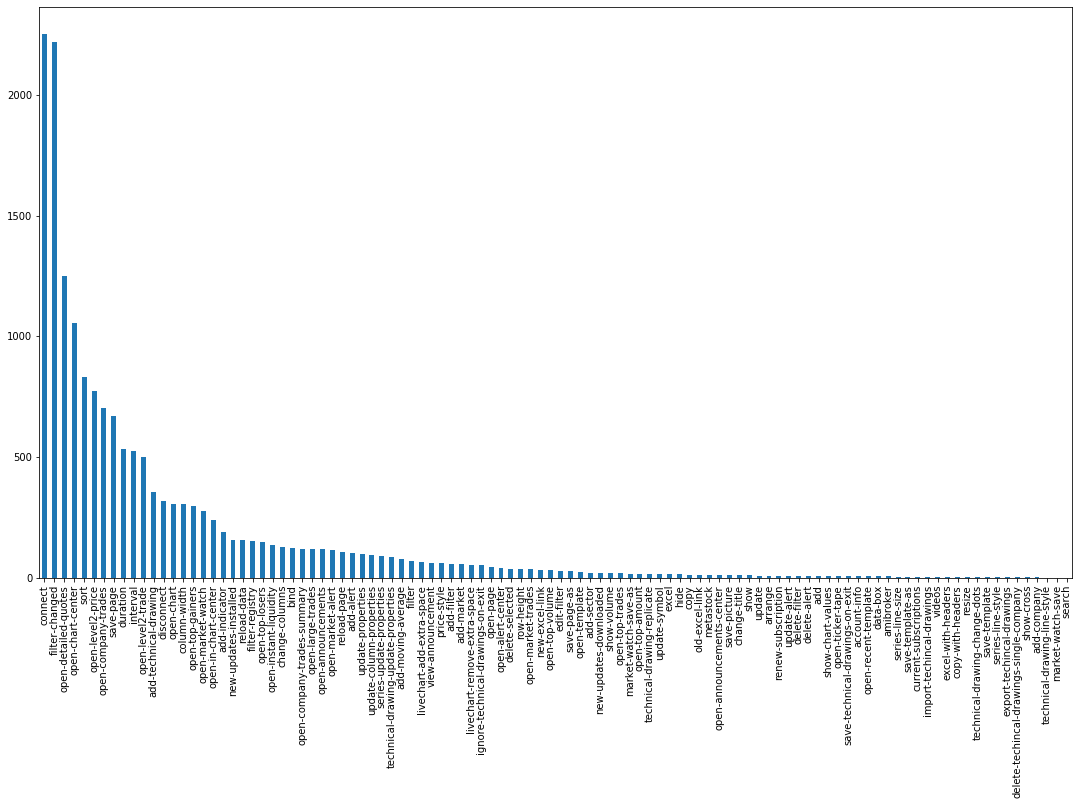

In [156]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fileDataFrame['Operation'].value_counts().plot(kind='bar')

Using mode for the two columns (operation and user)



In [126]:
fileDataFrameWithoutDuplicate = fileDataFrame.drop_duplicates(keep=False,inplace=True)

#The most frequency operation 
print('The Most used operation is ',fileDataFrame['Operation'].mode()[0])

#The most frequency User 
print('The Most user used operations is ',fileDataFrame['User'].mode()[0])

The Most used operation is  connect
The Most user used operations is  user405


**Another Solutin using python collections (Incomplete)**

In [157]:
from collections import Counter

users = []
operations = []
data = [] 
data2 = []

#Remove DateTime from each record
for word in fileData:
    word = word[25:] #Remove DateTime From each row
    data.append(word.split('/'))
    users.append(word.split('/')[0])
    operations.append(word.split('/')[-1])


print(len(data))

#Remove duplicates to encoured the only first operation for user
data = set(tuple(element) for element in data)
#print(len(data))
#print(len(set(operations)))
#print(len(set(users)))



111234
